<a href="https://colab.research.google.com/github/blessingitodo/Covid19-Data-Analysis/blob/main/covid19_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving vaccination_data.csv to vaccination_data.csv
Saving covid19_global_data.csv to covid19_global_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [3]:
covid19_global_data = pd.read_csv('covid19_global_data.csv')
vaccination_data = pd.read_csv('vaccination_data.csv')

In [4]:
covid19_global_data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [5]:
vaccination_data.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Aruba,ABW,AMRO,REPORTING,2023-12-29,217124.0,90493.0,203.0,85.0,84363.0,79.0,NaN,2021-02-17,NaN,35659.0,33.0
1,Afghanistan,AFG,EMRO,REPORTING,2023-12-31,22964750.0,19151369.0,59.0,49.0,18370386.0,47.0,NaN,2021-02-22,NaN,2729940.0,7.0
2,Angola,AGO,AFRO,REPORTING,2023-12-31,27819132.0,16550642.0,85.0,50.0,9609080.0,29.0,NaN,2021-03-10,NaN,3067091.0,9.0
3,Anguilla,AIA,AMRO,REPORTING,2023-12-29,24864.0,10858.0,166.0,72.0,10382.0,69.0,NaN,2021-02-05,NaN,3231.0,22.0
4,Albania,ALB,EURO,REPORTING,2023-12-23,3088966.0,1349255.0,107.0,47.0,1279333.0,44.0,NaN,2021-01-13,NaN,402371.0,14.0


In [6]:
covid19_global_data['Country'] = covid19_global_data['Country'].str.replace(pat='Cura�ao', repl='Curacao', regex=False)
covid19_global_data['Country'] = covid19_global_data['Country'].str.replace(pat='C�te d\'Ivoire', repl='Cote d\'Ivoire', regex=False)
covid19_global_data['Country'] = covid19_global_data['Country'].str.replace(pat='R�union', repl='Reunion', regex=False)
covid19_global_data['Country'] = covid19_global_data['Country'].str.replace(pat='Saint Barth�lemy', repl='Saint Barthelemy', regex=False)
covid19_global_data['Country'] = covid19_global_data['Country'].str.replace(pat='T�rkiye', repl='Turkiye', regex=False)

In [7]:
covid19_global_data.loc[[12194, 13047, 45247, 46321, 56151]]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
12194,2020-01-19,CI,Cote d'Ivoire,AFRO,NaN,0,NaN,0
13047,2021-10-17,CW,Curacao,AMRO,181.0,16885,1.0,169
45247,2020-09-06,RE,Reunion,NaN,558.0,2115,3.0,6
46321,2021-10-17,BL,Saint Barthelemy,NaN,1.0,1659,0.0,4
56151,2020-05-03,TR,Turkiye,EURO,16602.0,124375,630.0,3336


In [8]:
who_region_mapping = {'Falkland Islands (Malvinas)': 'AMRO', 'Faroe Islands': 'EURO', 'French Guiana': 'AMRO', 'Gibraltar': 'EURO','Guadeloupe': 'AMRO',
    'Guernsey': 'EURO', 'Holy See': 'EURO', 'Isle of Man': 'EURO', 'Jersey': 'EURO', 'Liechtenstein': 'EURO', 'Martinique': 'AMRO','Mayotte': 'AFRO',
    'Pitcairn': 'WPRO', 'Reunion': 'AFRO', 'Saint Barthelemy': 'AMRO', 'Saint Helena': 'AFRO', 'Saint Martin (French part)': 'AMRO', 'Saint Pierre and Miquelon': 'AMRO'}
covid19_global_data.loc[pd.isna(covid19_global_data['WHO_region']), 'WHO_region'] = covid19_global_data['Country'].map(who_region_mapping)

covid19_global_data[covid19_global_data['Country'] == 'Reunion']

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
45212,2020-01-05,RE,Reunion,AFRO,NaN,0,NaN,0
45213,2020-01-12,RE,Reunion,AFRO,NaN,0,NaN,0
45214,2020-01-19,RE,Reunion,AFRO,NaN,0,NaN,0
45215,2020-01-26,RE,Reunion,AFRO,NaN,0,NaN,0
45216,2020-02-02,RE,Reunion,AFRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
45461,2024-10-13,RE,Reunion,AFRO,NaN,494595,NaN,921
45462,2024-10-20,RE,Reunion,AFRO,NaN,494595,NaN,921
45463,2024-10-27,RE,Reunion,AFRO,NaN,494595,NaN,921
45464,2024-11-03,RE,Reunion,AFRO,NaN,494595,NaN,921


In [9]:
covid19_global_data = covid19_global_data.fillna(0)

In [10]:
covid19_global_data.head(20)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,0.0,0,0.0,0
1,2020-01-12,AF,Afghanistan,EMRO,0.0,0,0.0,0
2,2020-01-19,AF,Afghanistan,EMRO,0.0,0,0.0,0
3,2020-01-26,AF,Afghanistan,EMRO,0.0,0,0.0,0
4,2020-02-02,AF,Afghanistan,EMRO,0.0,0,0.0,0
5,2020-02-09,AF,Afghanistan,EMRO,0.0,0,0.0,0
6,2020-02-16,AF,Afghanistan,EMRO,0.0,0,0.0,0
7,2020-02-23,AF,Afghanistan,EMRO,0.0,0,0.0,0
8,2020-03-01,AF,Afghanistan,EMRO,1.0,1,0.0,0
9,2020-03-08,AF,Afghanistan,EMRO,0.0,1,0.0,0


In [11]:
covid19_global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60960 entries, 0 to 60959
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      60960 non-null  object 
 1   Country_code       60960 non-null  object 
 2   Country            60960 non-null  object 
 3   WHO_region         60960 non-null  object 
 4   New_cases          60960 non-null  float64
 5   Cumulative_cases   60960 non-null  int64  
 6   New_deaths         60960 non-null  float64
 7   Cumulative_deaths  60960 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.7+ MB


In [12]:
covid19_global_data.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,6.096000e+04,6.096000e+04,60960.000000,6.096000e+04
mean,1.274346e+04,1.866433e+06,116.067388,2.049375e+04
std,2.168722e+05,8.018271e+06,790.104535,8.330963e+04
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,0.000000e+00,5.085000e+03,0.000000,3.100000e+01
50%,3.700000e+01,4.898100e+04,0.000000,6.230000e+02
75%,1.066000e+03,5.655912e+05,10.000000,7.296750e+03
max,4.047548e+07,1.034368e+08,47687.000000,1.207479e+06


In [13]:
drop_columns = ['Country_code', 'New_cases', 'New_deaths']
covid19_global_data = covid19_global_data.drop(labels=drop_columns, axis=1)
column_mapper = {'Date_reported': 'Date'}
covid19_global_data = covid19_global_data.rename(mapper=column_mapper, axis=1)

In [14]:
covid19_global_data['Date'] = pd.to_datetime(covid19_global_data['Date'], format='%Y-%m-%d')

In [15]:
covid19_global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60960 entries, 0 to 60959
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               60960 non-null  datetime64[ns]
 1   Country            60960 non-null  object        
 2   WHO_region         60960 non-null  object        
 3   Cumulative_cases   60960 non-null  int64         
 4   Cumulative_deaths  60960 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.3+ MB


In [16]:
covid19_global_data['Cumulative_recovered'] = covid19_global_data['Cumulative_cases'] - covid19_global_data['Cumulative_deaths']

In [17]:
countrywise = pd.pivot_table(covid19_global_data, values=['Cumulative_cases', 'Cumulative_deaths', 'Cumulative_recovered'], index='Country', aggfunc=max)

<ipython-input-17-aa2cbecc06f5>:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  countrywise = pd.pivot_table(covid19_global_data, values=['Cumulative_cases', 'Cumulative_deaths', 'Cumulative_recovered'], index='Country', aggfunc=max)


In [18]:
countrywise['Recovery_rate'] = countrywise['Cumulative_recovered']*100/countrywise['Cumulative_cases']

In [19]:
countrywise['Death_rate'] = countrywise['Cumulative_deaths']*100/countrywise['Cumulative_cases']

In [20]:
countrywise = countrywise.sort_values(by='Cumulative_cases', ascending=False)

In [21]:
countrywise.style.background_gradient(cmap='cubehelix')

,Cumulative_cases,Cumulative_deaths,Cumulative_recovered,Recovery_rate,Death_rate
Country,,,,,
United States of America,103436829,1207479,102309677,98.910299,1.167359
China,99381189,122375,99258814,99.876863,0.123137
India,45044346,533655,44510691,98.815268,1.184732
France,39027283,168091,38859192,99.569299,0.430701
Germany,38437756,174979,38262777,99.544773,0.455227
Brazil,37511921,702116,36809805,98.128286,1.871714
Republic of Korea,34571873,35934,34535939,99.896060,0.103940
Japan,33803572,74694,33728878,99.779035,0.220965
Italy,26826486,197542,26628944,99.263631,0.736369


In [22]:
regionwise = pd.pivot_table(covid19_global_data, values=['Cumulative_cases', 'Cumulative_deaths', 'Cumulative_recovered'], index='WHO_region', aggfunc=max)

<ipython-input-22-0002213396ed>:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  regionwise = pd.pivot_table(covid19_global_data, values=['Cumulative_cases', 'Cumulative_deaths', 'Cumulative_recovered'], index='WHO_region', aggfunc=max)


In [23]:
regionwise['Recovery_rate'] = regionwise['Cumulative_recovered']*100/regionwise['Cumulative_cases']

In [24]:
regionwise['Death_rate'] = regionwise['Cumulative_deaths']*100/regionwise['Cumulative_cases']

In [25]:
regionwise = regionwise.sort_values(by='Cumulative_cases', ascending=False)

In [26]:
regionwise.style.background_gradient(cmap='cubehelix')

,Cumulative_cases,Cumulative_deaths,Cumulative_recovered,Recovery_rate,Death_rate
WHO_region,,,,,
AMRO,103436829,1207479,102309677,98.910299,1.167359
WPRO,99381189,122375,99258814,99.876863,0.123137
SEARO,45044346,533655,44510691,98.815268,1.184732
EURO,39027283,403672,38859192,99.569299,1.034333
EMRO,7627863,146837,7481026,98.074992,1.925008
AFRO,4072819,102595,3970224,97.480983,2.519017
OTHER,712,13,705,99.016854,1.825843


In [29]:
# Top 10 recovered cases
top_10_recovered = covid19_global_data.groupby(by='Country').max()[['Cumulative_recovered', 'Date']].sort_values(by='Cumulative_recovered', ascending=False).reset_index()

In [30]:
fig = plt.figure(figsize=(16, 9))

<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Top 10 Countries with the most Recovered Cases')

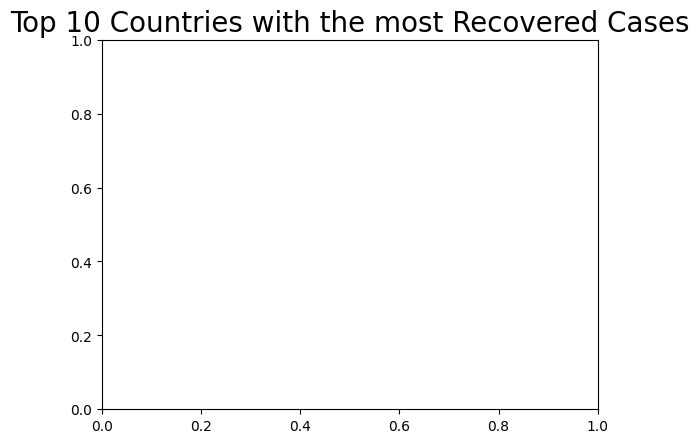

In [32]:
plt.title('Top 10 Countries with the most Recovered Cases', size=20)

<ipython-input-35-ce0ff57416a2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.barplot(data=top_10_recovered.iloc[:10], y='Cumulative_recovered', x='Country', palette='colorblind', linewidth=2, edgecolor='blue')


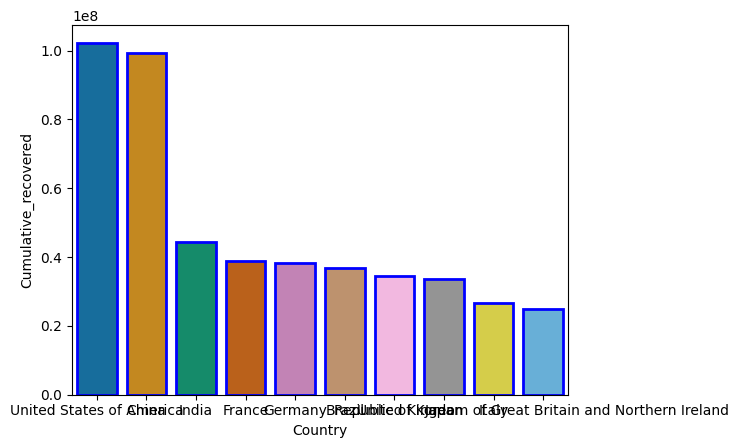

In [35]:
axis = sns.barplot(data=top_10_recovered.iloc[:10], y='Cumulative_recovered', x='Country', palette='colorblind', linewidth=2, edgecolor='blue')

<ipython-input-45-852163d098e0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.barplot(data=top_10_recovered.iloc[:10], y='Cumulative_recovered', x='Country', palette='colorblind', linewidth=4, edgecolor='blue')
<ipython-input-45-852163d098e0>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(wrapped_labels)


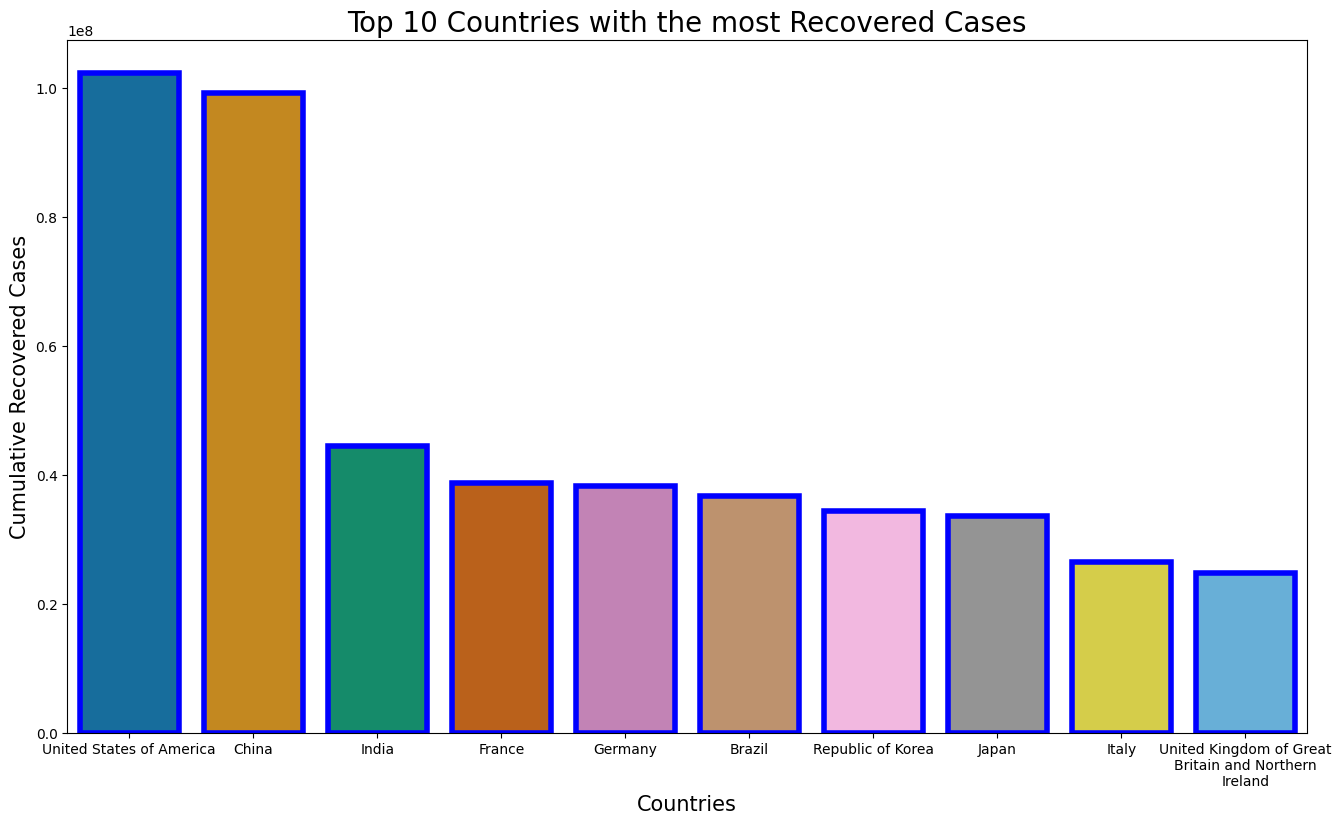

In [45]:
import textwrap

# Top 10 recovered cases
top_10_recovered = covid19_global_data.groupby(by='Country').max()[['Cumulative_recovered', 'Date']].sort_values(by='Cumulative_recovered', ascending=False).reset_index()
fig = plt.figure(figsize=(16, 9))
plt.title('Top 10 Countries with the most Recovered Cases', size=20)
axis = sns.barplot(data=top_10_recovered.iloc[:10], y='Cumulative_recovered', x='Country', palette='colorblind', linewidth=4, edgecolor='blue')

plt.xlabel('Countries', size=15)
plt.ylabel('Cumulative Recovered Cases', size=15)
labels = plt.gca().get_xticklabels()
wrapped_labels = [textwrap.fill(label.get_text(), 25) for label in labels]
plt.gca().set_xticklabels(wrapped_labels)

plt.show()

<ipython-input-49-f11f449a725b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis=sns.barplot(data=top_10_deaths.iloc[:10], y='Cumulative_deaths', x='Country', palette='colorblind', linewidth=2, edgecolor='red')
<ipython-input-49-f11f449a725b>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(wrapped_labels)


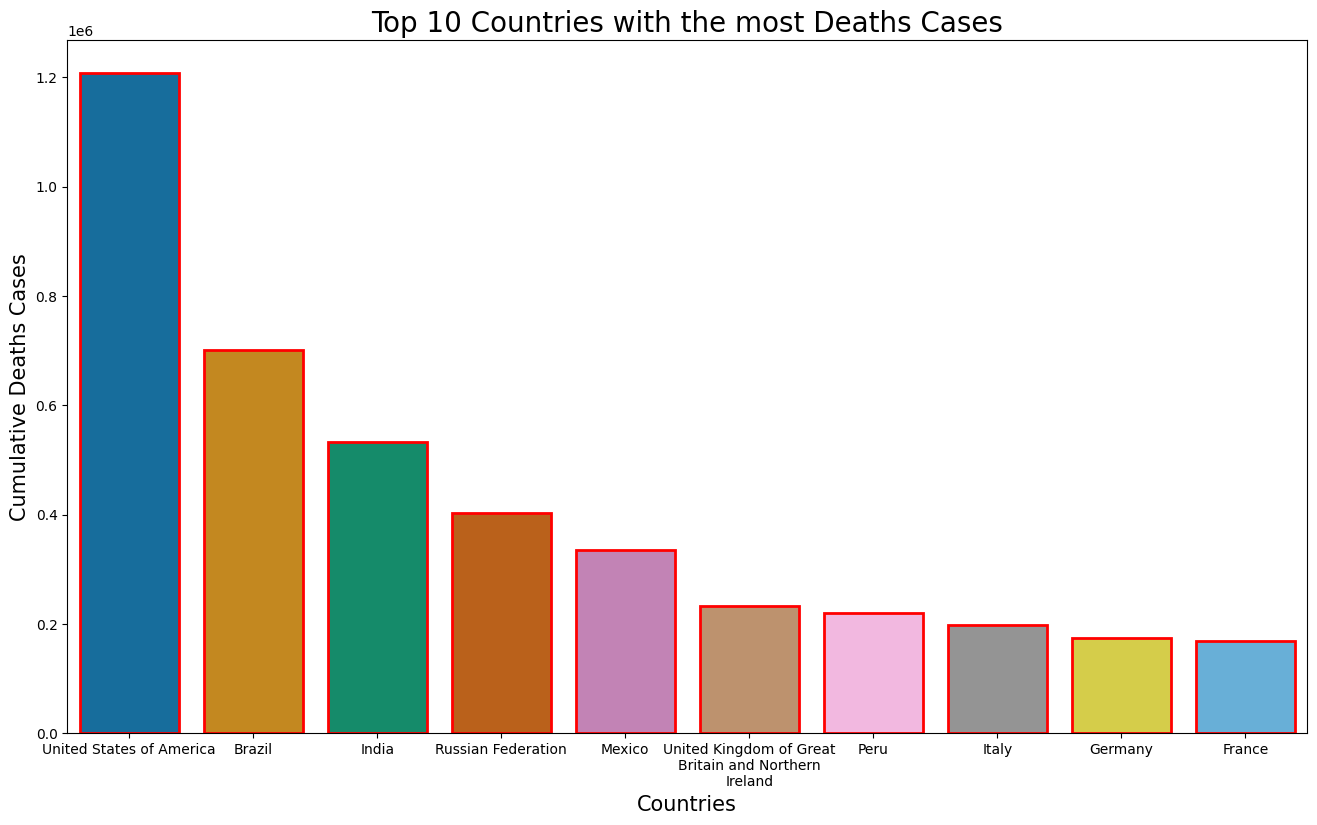

In [49]:
# Top 10 deaths cases
top_10_deaths = covid19_global_data.groupby(by='Country').max()[['Cumulative_deaths', 'Date']].sort_values(by='Cumulative_deaths', ascending=False).reset_index()
fig=plt.figure(figsize=(16, 9))
plt.title('Top 10 Countries with the most Deaths Cases', size=20)
axis=sns.barplot(data=top_10_deaths.iloc[:10], y='Cumulative_deaths', x='Country', palette='colorblind', linewidth=2, edgecolor='red')

plt.xlabel('Countries', size=15)
plt.ylabel('Cumulative Deaths Cases', size=15)
labels = plt.gca().get_xticklabels()
wrapped_labels = [textwrap.fill(label.get_text(), 25) for label in labels]
plt.gca().set_xticklabels(wrapped_labels)

plt.show()

<ipython-input-51-11adbfeda2d3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis=sns.barplot(data=top_10_deaths.iloc[:10], y='Cumulative_cases', x='Country', palette='colorblind', linewidth=2, edgecolor='seagreen')
<ipython-input-51-11adbfeda2d3>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(wrapped_labels)


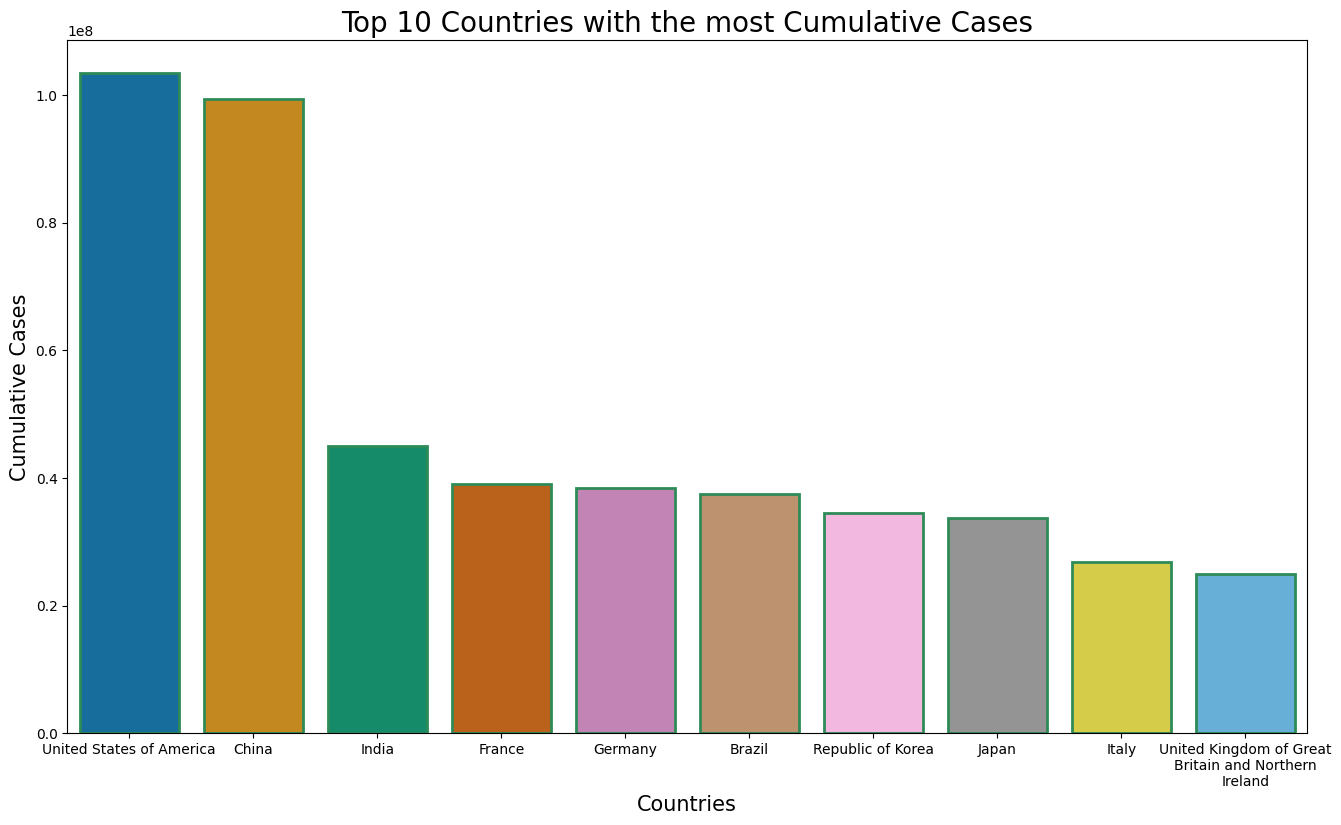

In [51]:
# Top 10 Cumulative_cases
top_10_deaths = covid19_global_data.groupby(by='Country').max()[['Cumulative_cases', 'Date']].sort_values(by='Cumulative_cases', ascending=False).reset_index()
fig=plt.figure(figsize=(16, 9))
plt.title('Top 10 Countries with the most Cumulative Cases', size=20)
axis=sns.barplot(data=top_10_deaths.iloc[:10], y='Cumulative_cases', x='Country', palette='colorblind', linewidth=2, edgecolor='seagreen')

plt.xlabel('Countries', size=15)
plt.ylabel('Cumulative Cases', size=15)
labels = plt.gca().get_xticklabels()
wrapped_labels = [textwrap.fill(label.get_text(), 25) for label in labels]
plt.gca().set_xticklabels(wrapped_labels)

plt.show()

Text(0.5, 1.0, 'Growth Trend for top 10 Countries with the most Cases')

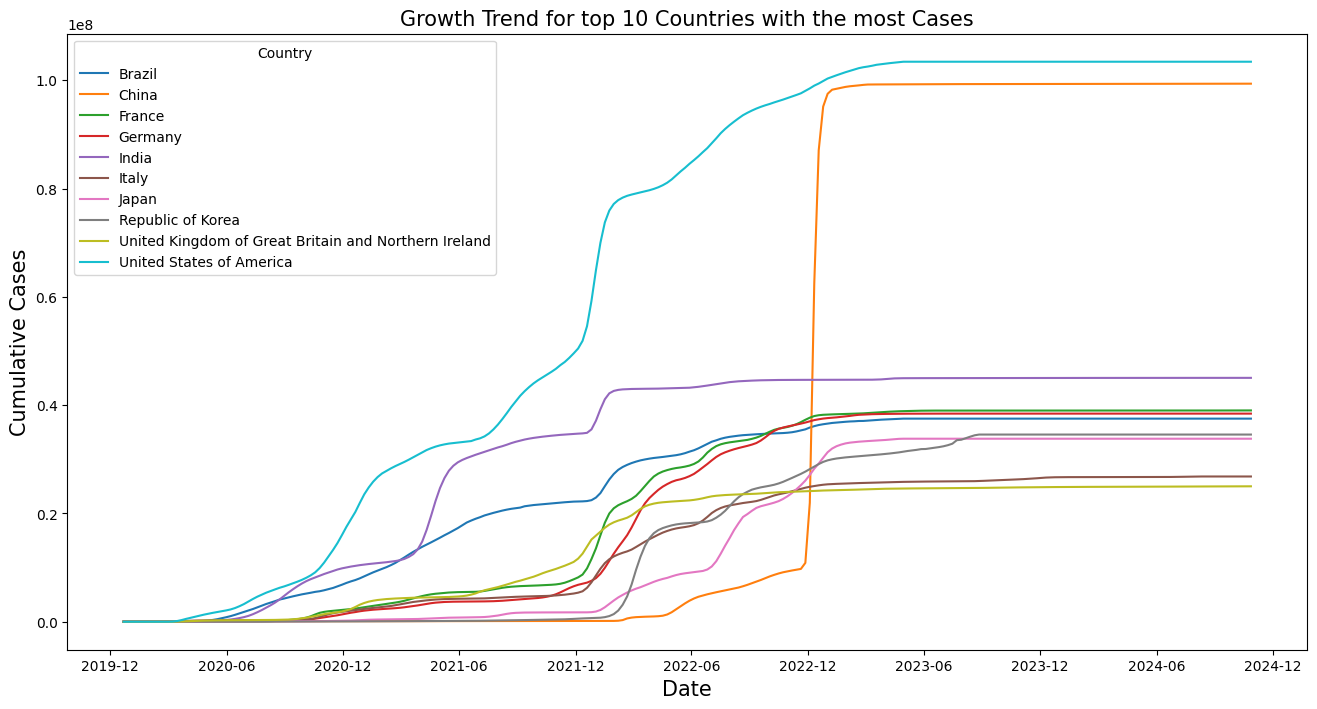

In [58]:
import matplotlib.dates as mdates

# Growth Trend for top 10 Countries with the most Cases
fig = plt.figure(figsize=(16, 8))
axis = sns.lineplot(data=covid19_global_data[covid19_global_data['Country'].isin(['United States of America', 'China', 'India', 'France', 'Germany', 'Brazil', 'Republic of Korea', 'Japan', 'Italy', 'United Kingdom of Great Britain and Northern Ireland'])], x='Date', y='Cumulative_cases', hue='Country')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=15, interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Date', size=15)
plt.ylabel('Cumulative Cases', size=15)
plt.title('Growth Trend for top 10 Countries with the most Cases', size=15)

Text(0.5, 1.0, 'Growth Trend for top 10 Countries with the Highest Death Cases')

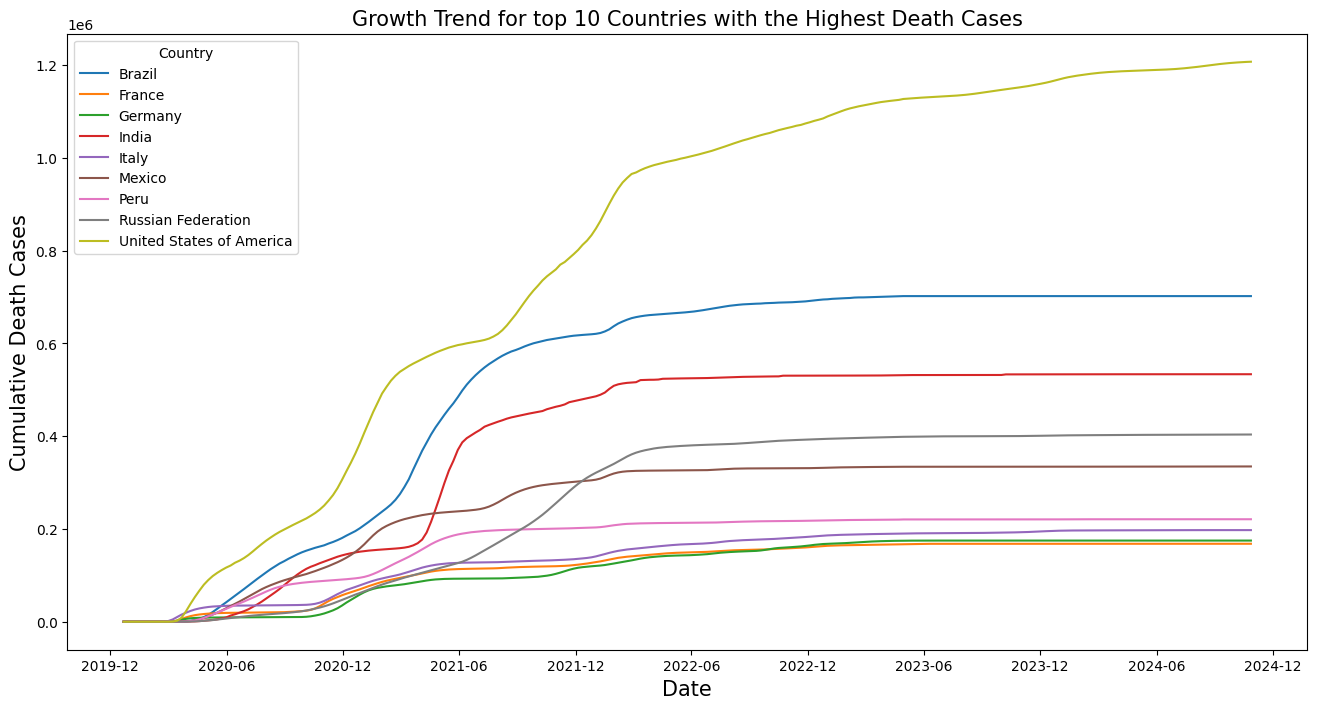

In [60]:
# Growth Trend for top 10 Countries with the most Death Cases

fig = plt.figure(figsize=(16, 8))
axis = sns.lineplot(data=covid19_global_data[covid19_global_data['Country'].isin(['United States of America', 'Brazil', 'India', 'Russian Federation', 'Mexico', 'United Kingdom of Great Britain and Northan Ireland', 'Peru', 'Italy', 'Germany', 'France'])], x='Date', y='Cumulative_deaths', hue='Country')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=15, interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Date', size=15)
plt.ylabel('Cumulative Death Cases', size=15)
plt.title('Growth Trend for top 10 Countries with the Highest Death Cases', size=15)

Text(0.5, 1.0, 'Growth Trend for top 10 Countries with the Highest Recovered Cases')

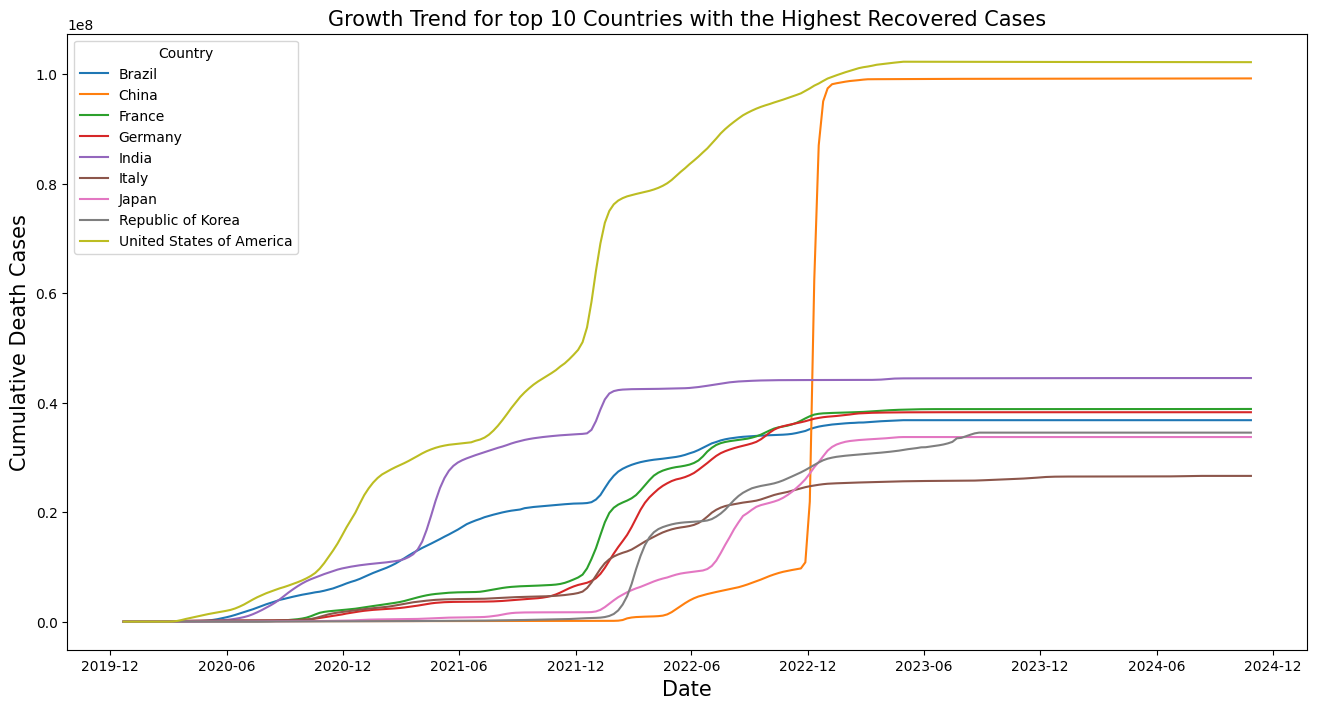

In [62]:
# Growth Trend for top 10 Countries with the most Recovered Cases

fig = plt.figure(figsize=(16, 8))
axis = sns.lineplot(data=covid19_global_data[covid19_global_data['Country'].isin(['United States of America', 'China', 'India', 'France', 'Germany', 'Brazil', 'Republic of Korea', 'Japan', 'Italy', 'United Kingdom of Great Britain and Northan Ireland'])], x='Date', y='Cumulative_recovered', hue='Country')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=15, interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Date', size=15)
plt.ylabel('Cumulative Death Cases', size=15)
plt.title('Growth Trend for top 10 Countries with the Highest Recovered Cases', size=15)

In [64]:
vaccination_data.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Aruba,ABW,AMRO,REPORTING,2023-12-29,217124.0,90493.0,203.0,85.0,84363.0,79.0,NaN,2021-02-17,NaN,35659.0,33.0
1,Afghanistan,AFG,EMRO,REPORTING,2023-12-31,22964750.0,19151369.0,59.0,49.0,18370386.0,47.0,NaN,2021-02-22,NaN,2729940.0,7.0
2,Angola,AGO,AFRO,REPORTING,2023-12-31,27819132.0,16550642.0,85.0,50.0,9609080.0,29.0,NaN,2021-03-10,NaN,3067091.0,9.0
3,Anguilla,AIA,AMRO,REPORTING,2023-12-29,24864.0,10858.0,166.0,72.0,10382.0,69.0,NaN,2021-02-05,NaN,3231.0,22.0
4,Albania,ALB,EURO,REPORTING,2023-12-23,3088966.0,1349255.0,107.0,47.0,1279333.0,44.0,NaN,2021-01-13,NaN,402371.0,14.0


In [66]:
vaccination_data['COUNTRY'] = vaccination_data['COUNTRY'].str.replace(pat='Cura�ao', repl='Curacao', regex=False)
vaccination_data['COUNTRY'] = vaccination_data['COUNTRY'].str.replace(pat='C�te d\'Ivoire', repl='Cote d\'Ivoire', regex=False)
vaccination_data['COUNTRY'] = vaccination_data['COUNTRY'].str.replace(pat='R�union', repl='Reunion', regex=False)
vaccination_data['COUNTRY'] = vaccination_data['COUNTRY'].str.replace(pat='Saint Barth�lemy', repl='Saint Barthelemy', regex=False)
vaccination_data['COUNTRY'] = vaccination_data['COUNTRY'].str.replace(pat='T�rkiye', repl='Turkiye', regex=False)

In [70]:
vaccination_data.loc[[30, 39, 147]]

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
30,Cote d'Ivoire,CIV,AFRO,REPORTING,2023-12-31,25263932.0,13568372.0,96.0,51.0,12164304.0,46.0,NaN,2021-03-01,NaN,3138712.0,12.0
39,Curacao,CUW,AMRO,REPORTING,2023-12-29,260324.0,108601.0,159.0,66.0,100885.0,61.0,NaN,NaN,NaN,47473.0,29.0
147,Turkiye,TUR,EURO,REPORTING,2023-12-23,152475057.0,57936783.0,181.0,69.0,53171790.0,63.0,NaN,NaN,NaN,27896331.0,33.0


In [71]:
vaccination_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               215 non-null    object 
 1   ISO3                                  215 non-null    object 
 2   WHO_REGION                            209 non-null    object 
 3   DATA_SOURCE                           215 non-null    object 
 4   DATE_UPDATED                          208 non-null    object 
 5   TOTAL_VACCINATIONS                    209 non-null    float64
 6   PERSONS_VACCINATED_1PLUS_DOSE         209 non-null    float64
 7   TOTAL_VACCINATIONS_PER100             207 non-null    float64
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  207 non-null    float64
 9   PERSONS_LAST_DOSE                     209 non-null    float64
 10  PERSONS_LAST_DOSE_PER100              207 non-null    float64
 11  VACCINES_USED      

In [73]:
vaccination_data.isnull().sum()

,0
COUNTRY,0
ISO3,0
WHO_REGION,6
DATA_SOURCE,0
DATE_UPDATED,7
TOTAL_VACCINATIONS,6
PERSONS_VACCINATED_1PLUS_DOSE,6
TOTAL_VACCINATIONS_PER100,8
PERSONS_VACCINATED_1PLUS_DOSE_PER100,8
PERSONS_LAST_DOSE,6
